# Imports

In [47]:
from seqeval.metrics import classification_report
from transformers import T5Tokenizer
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from src.data.make_conll2003 import get_example_sets
from src.models.evaluate import get_entities_from_tokens

In [48]:
sns.set()

# Setup

In [3]:
ENTITIES_TOKENS = [
    '<O>',
    '<PER>',
    '<ORG>',
    '<LOC>',
    '<MISC>',
    '<Ent>'
]

In [4]:
tokenizer = T5Tokenizer.from_pretrained('t5-small')

In [5]:
tokenizer.add_tokens(ENTITIES_TOKENS)

6

In [19]:
examples_sets = get_example_sets('../data/conll2003/', merge_O=True)

In [20]:
def get_all_entites_from_examples(examples):
    entities = []
    for ex in examples:
        source_tokens = tokenizer.tokenize(ex.source)
        target_tokens = tokenizer.tokenize(ex.target)

        ents = get_entities_from_tokens(target_tokens, tokenizer, ENTITIES_TOKENS, len(source_tokens))

        entities.append(ents)
    return entities

# Olhando exemplos

In [49]:
for ex in examples_sets['train'][120:200]:
    print(ex)
    print()

Source: The media ...
Target: The media ... <O>

Source: are full of expressions and declarations that must be worrying ...
Target: are full of expressions and declarations that must be worrying ... <O>

Source: this artificial atmosphere is very dangerous because those who spread it could become its prisoners , " Levy said .
Target: this artificial atmosphere is very dangerous because those who spread it could become its prisoners , " <O> Levy <PER> said . <O>

Source: " We expect from Syria , if its face is to peace , that it will answer Israel 's message to enter peace negotiations because that is our goal , " he said . "
Target: " We expect from <O> Syria <LOC> , if its face is to peace , that it will answer <O> Israel <LOC> 's message to enter peace negotiations because that is our goal , " he said . " <O>

Source: We do not want a war , God forbid .
Target: We do not want a war , <O> God <PER> forbid . <O>

Source: No one benefits from wars . "
Target: No one benefits from wars .

In [22]:
for ex in examples_sets['valid'][:20]:
    print(ex)
    print()

Source: CRICKET - LEICESTERSHIRE TAKE OVER AT TOP AFTER INNINGS VICTORY .
Target: CRICKET - <O> LEICESTERSHIRE <ORG> TAKE OVER AT TOP AFTER INNINGS VICTORY . <O>

Source: LONDON 1996-08-30
Target: LONDON <LOC> 1996-08-30 <O>

Source: West Indian all-rounder Phil Simmons took four for 38 on Friday as Leicestershire beat Somerset by an innings and 39 runs in two days to take over at the head of the county championship .
Target: West Indian <MISC> all-rounder <O> Phil Simmons <PER> took four for 38 on Friday as <O> Leicestershire <ORG> beat <O> Somerset <ORG> by an innings and 39 runs in two days to take over at the head of the county championship . <O>

Source: Their stay on top , though , may be short-lived as title rivals Essex , Derbyshire and Surrey all closed in on victory while Kent made up for lost time in their rain-affected match against Nottinghamshire .
Target: Their stay on top , though , may be short-lived as title rivals <O> Essex <ORG> , <O> Derbyshire <ORG> and <O> Surrey

In [23]:
for ex in examples_sets['test'][:20]:
    print(ex)
    print()

Source: SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRISE DEFEAT .
Target: SOCCER - <O> JAPAN <LOC> GET LUCKY WIN , <O> CHINA <PER> IN SURPRISE DEFEAT . <O>

Source: Nadim Ladki
Target: Nadim Ladki <PER>

Source: AL-AIN , United Arab Emirates 1996-12-06
Target: AL-AIN <LOC> , <O> United Arab Emirates <LOC> 1996-12-06 <O>

Source: Japan began the defence of their Asian Cup title with a lucky 2-1 win against Syria in a Group C championship match on Friday .
Target: Japan <LOC> began the defence of their <O> Asian Cup <MISC> title with a lucky 2-1 win against <O> Syria <LOC> in a Group C championship match on Friday . <O>

Source: But China saw their luck desert them in the second match of the group , crashing to a surprise 2-0 defeat to newcomers Uzbekistan .
Target: But <O> China <LOC> saw their luck desert them in the second match of the group , crashing to a surprise 2-0 defeat to newcomers <O> Uzbekistan <LOC> . <O>

Source: China controlled most of the match and saw several chances m

# Treino

In [24]:
train_entities = get_all_entites_from_examples(examples_sets['train'])

In [25]:
report = classification_report(train_entities, train_entities, )

In [26]:
print(report)

           precision    recall  f1-score   support

      ORG       1.00      1.00      1.00      6319
      LOC       1.00      1.00      1.00      7140
      PER       1.00      1.00      1.00      6600
     MISC       1.00      1.00      1.00      3438

micro avg       1.00      1.00      1.00     23497
macro avg       1.00      1.00      1.00     23497



In [27]:
train_entities = sum(train_entities, [])

In [29]:
train_entities[:10]

['B-ORG', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']

In [36]:
i = 0
idx = 0
while idx < len(train_entities):
    label = train_entities[idx]
    if label == 'O':
        while idx < len(train_entities) and train_entities[idx] == 'O':
            idx += 1
        i += 1
    else:
        idx += 1

In [37]:
i

22916

In [18]:
(np.array().flatten() == 'O').sum()

235319

# Validação

In [26]:
valid_entities = get_all_entites_from_examples(examples_sets['valid'])

In [27]:
report = classification_report(valid_entities, valid_entities,)

In [28]:
print(report)

           precision    recall  f1-score   support

     MISC       1.00      1.00      1.00       922
      LOC       1.00      1.00      1.00      1837
      PER       1.00      1.00      1.00      1842
      ORG       1.00      1.00      1.00      1340

micro avg       1.00      1.00      1.00      5941
macro avg       1.00      1.00      1.00      5941



In [29]:
(np.array(sum(valid_entities, [])).flatten() == 'O').sum()

59238

# Teste

In [33]:
test_entities = get_all_entites_from_examples(examples_sets['test'])

In [34]:
report = classification_report(test_entities, test_entities,)

In [35]:
print(report)

           precision    recall  f1-score   support

      ORG       1.00      1.00      1.00      1660
     MISC       1.00      1.00      1.00       701
      LOC       1.00      1.00      1.00      1666
      PER       1.00      1.00      1.00      1615

micro avg       1.00      1.00      1.00      5642
macro avg       1.00      1.00      1.00      5642



In [36]:
(np.array(sum(test_entities, [])).flatten() == 'O').sum()

54019

# Visualizando

In [37]:
for key, exs in examples_sets.items():
    print(key, len(exs))

train 14040
valid 3249
test 3451


In [80]:
data = {
    'PER': [6600, 1842, 1617],
    'ORG': [6321, 1341, 1661],
    'LOC': [7140, 1837, 1668],
    'MISC': [3438, 922, 702],
#     'O': [236520, 59238, 54019],
#     'Conjunto': ['Treino', 'Validação', 'Teste']
}

In [81]:
ents, types = [], []
for key, values in data.items():
    for v, t in zip(values, ['Treino', 'Validação', 'Teste']):
        ents += [key] * v
        types += [t] * v

In [82]:
df = pd.DataFrame({'Entidades': ents, 'Conjunto': types})

In [85]:
df

,Entidades,Conjunto
0,PER,Treino
1,PER,Treino
2,PER,Treino
3,PER,Treino
4,PER,Treino
...,...,...
35084,MISC,Teste
35085,MISC,Teste
35086,MISC,Teste
35087,MISC,Teste


Text(0, 0.5, '')

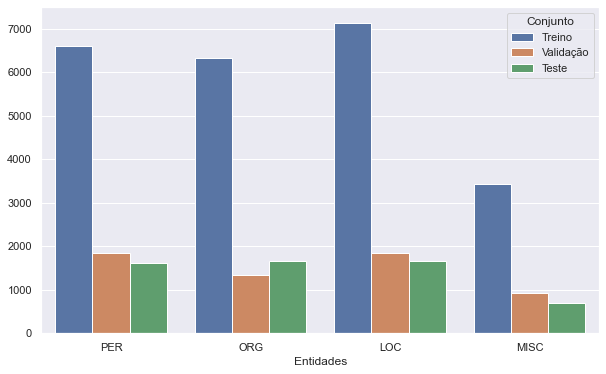

In [92]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Entidades', hue='Conjunto', data=df)
ax.set_ylabel('')